In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from wordcloud import WordCloud
import string
import nltk
from nltk.corpus import stopwords


In [2]:
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

file_path = 'WikiQA-dev.tsv'
df = pd.read_csv(file_path, sep='\t')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\koval\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
def preprocess_text(text_data):
    processed = []
    
    for text in text_data:
        text = ''.join([char for char in text if char not in string.punctuation])
        
        tokens = text.split()
        tokens = [word.lower() for word in tokens if word.lower() not in stop_words]
        
        processed.append(' '.join(tokens))
    
    return processed

def generate_wordcloud(data, label_column, text_column):
    labels = data[label_column].unique()  
    
    for label in labels:
        label_data = data[data[label_column] == label]
        
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(label_data[text_column]))

        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'WordCloud for Class: {label}')
        plt.axis('off')
        plt.show()

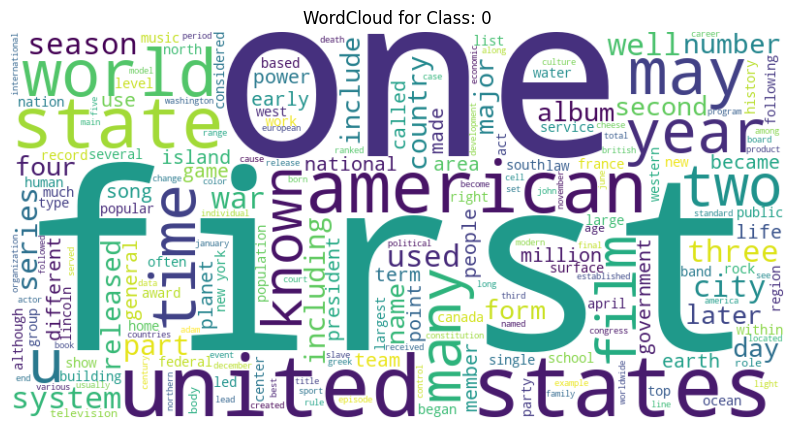

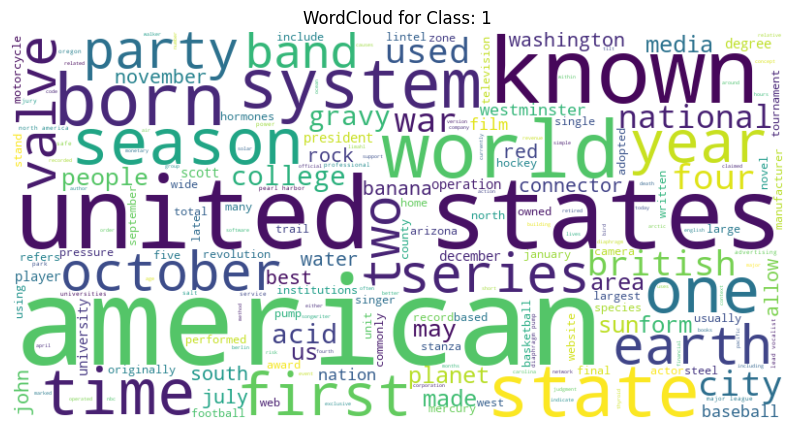

In [4]:
df['cleaned_text'] = preprocess_text(df['Sentence'])

generate_wordcloud(df, 'Label', 'cleaned_text')

In [5]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X = vectorizer.fit_transform(df['cleaned_text']) 
y = df['Label']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9287020109689214
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96       508
           1       0.00      0.00      0.00        39

    accuracy                           0.93       547
   macro avg       0.46      0.50      0.48       547
weighted avg       0.86      0.93      0.89       547



c:\Users\koval\DataAnalysisLab2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\koval\DataAnalysisLab2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\koval\DataAnalysisLab2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
